## Problem Statement: Graduate Admissions Predictions

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

## Logistic Regression

In [132]:
# importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Read the input dataset

admission_data=pd.read_csv("Admission_Predict.csv")

In [105]:
# display the head of the dataset
admission_data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [106]:
# print the number students in the dataset
print("# of students in original data: " +str(len(admission_data.index)))

# of students in original data: 500


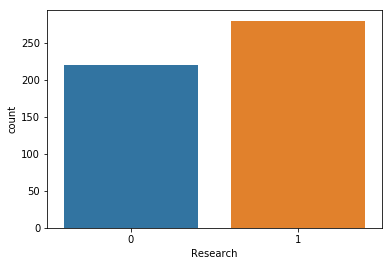

In [133]:
# plot how many students have done the research project
sns.countplot(x="Research",data=admission_data)

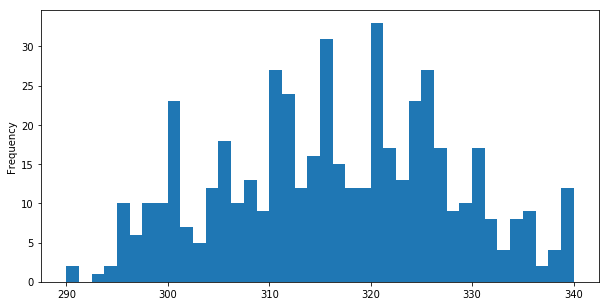

In [134]:
# GRE Score Information of the Dataset

admission_data["GRE Score"].plot.hist(bins=40,figsize=(10,5))

In [135]:
# Column Information of the Dataset

admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


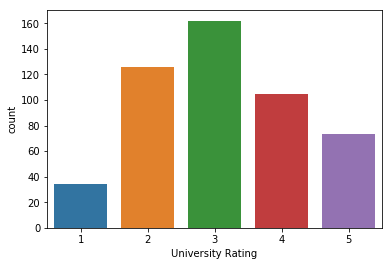

In [136]:
#plot the university rating

sns.countplot(x="University Rating",data=admission_data)

In [111]:
# import sklearn package to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

## Assumptions
1. In order to build a Logistic Regression Model ,we need a output variable which is said to be binary in nature i.e having a value of either 0 or 1
2. Currently Chance of Admit has a Probability Value of Student getting an Admission
3. I will set a threshold of value of 0.75 i.e Students whose Chance of Admit value is greater than 0.75 will get an admission (i.e value will be 1) and value less than 0.75 will be treated as 0

In [112]:
# Convert Chance of Admit Column into 0 and 1 as this will be considered as response variable

admission_data.loc[admission_data['Chance of Admit ']>0.75,'Chance of Admit ']=1
admission_data.loc[admission_data['Chance of Admit ']<0.75,'Chance of Admit ']=0
admission_data['Chance of Admit ']=admission_data['Chance of Admit '].astype(np.int64)
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


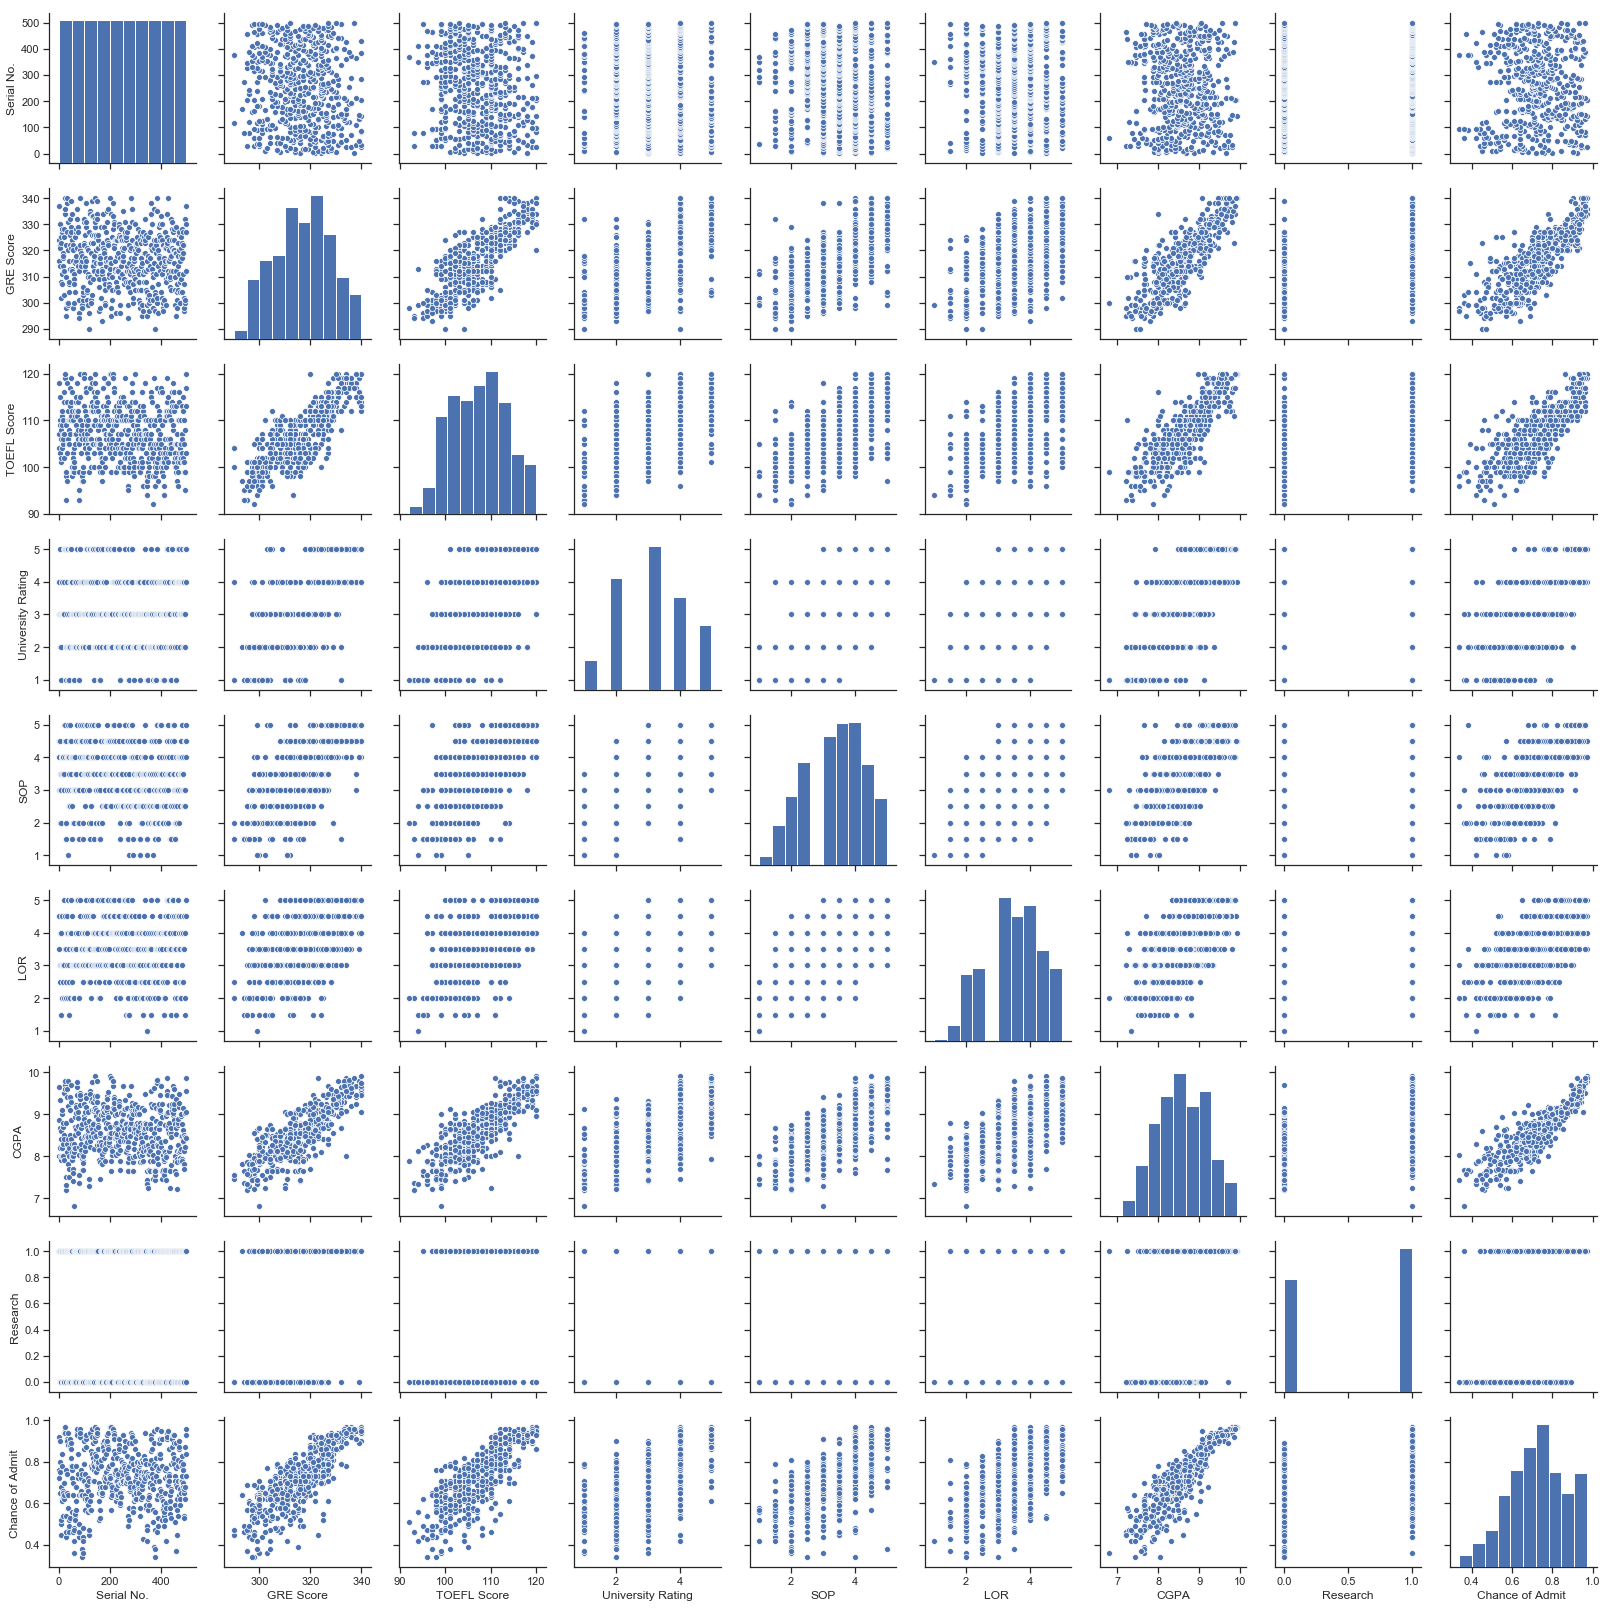

In [138]:
# Understand the Correlation between the Columns in the dataset
sns.set(style='ticks',color_codes=True)
sns.pairplot(admission_data)
plt.show()

#### GRE Score is said to be highly correlated with TOEFL Score, CGPA



In [113]:
# Divide the input dataset into train and test dataset
# Putting Feature Variable into X
# Putting Response Variable into Y


X= admission_data.drop(columns=['Chance of Admit '])
y= admission_data["Chance of Admit "]

In [139]:
# Check for Missing Values in any of the Columns in the dataset

admission_data.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [115]:
# Drop Unnecessary Columns from the Dataset
 
admission_data=admission_data.drop(['Serial No.'],axis=1)

In [116]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Chance of Admit , dtype: int64

In [117]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
model.fit(X_train,y_train)

C:\Users\Bibu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Predictions

In [124]:
predictions= model.predict(X_test)

In [125]:
from sklearn.metrics import classification_report

In [126]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.87      0.89      0.88        88\n           1       0.83      0.81      0.82        62\n\n   micro avg       0.85      0.85      0.85       150\n   macro avg       0.85      0.85      0.85       150\nweighted avg       0.85      0.85      0.85       150\n'

#### Confusion matrix

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[78, 10],
       [12, 50]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8533333333333334

#### Conclusion: The accuracy of the Logstic Regression model is approx 86% which is pretty good

## Linear Regression

In [2]:
# importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Read the input dataset

graduate_data=pd.read_csv("Admission_Predict.csv")

In [3]:
# display the head of the dataset
graduate_data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
#collecting X and Y
X=graduate_data['GRE Score'].values
Y=graduate_data['Chance of Admit '].values

In [25]:
# calculating mean of X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)

#Total umber of values
m=len(X)

#Using formula to calculate b0 and b1
numer=0
denom=0

for i in range(m):
    numer +=(X[i] -mean_x) * (Y[i]-mean_y)
    denom += (X[i] -mean_x) **2
    
b1=numer/denom
b0=mean_y-(b1*mean_x)

# print the coefficients
print(b1,b0)
    
    

0.010125871060764608 -2.4828146663422967


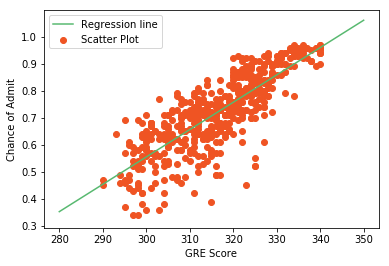

In [26]:
# Plotting the values and regression line
max_x=np.max(X)+10
min_x=np.min(X)- 10

#Calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y=b0 +b1 * x

# Plotting line and scatter points

plt.plot(x,y,color='#58b970',label='Regression line')

plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

In [27]:
# calculating the R square

ss_t=0
ss_r=0

for i in range(m):
    y_pred=b0 + b1 * X[i]
    ss_t +=(Y[i] -mean_y) **2
    ss_r +=(Y[i] -y_pred) **2
    
r2=1-(ss_r/ss_t)
print(r2)
    
    

0.6566681523957094
